In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')

from sklearn.metrics.cluster import homogeneity_score

In [45]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [46]:
df.head(2)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.60,0.03,0.00,0.00,0.28,0.33,0.05,0.67,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.02,0.00,0.00,0.00,0.51,0.60,0.10,0.60,0.00,0.00


In [47]:
df =df.loc[:, df.columns != 'FECHA_ÚLTIMO_MOVIMIENTO']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Alimentos preparados y conservado

In [49]:
df.head(3)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.60,0.03,0.00,0.00,0.28,0.33,0.05,0.67,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.02,0.00,0.00,0.00,0.51,0.60,0.10,0.60,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.30,0.02,0.00,0.00,0.09,0.09,0.00,0.94,0.00,0.00


# CLUSTERING

In [50]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [51]:
wcss = []
for i in range (1, 18):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

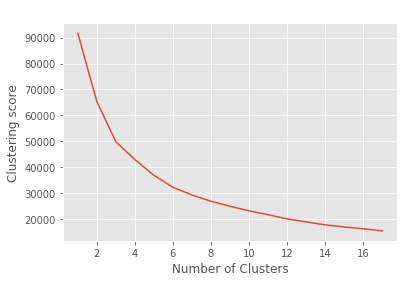

In [52]:
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [53]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
df_scaled = df[3:4]
df_scaled

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.00,1.00,0.00,0.00


In [55]:
# df['KMeans_Cluster'] = clustering.labels_
df.head()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.60,0.03,0.00,0.00,0.28,0.33,0.05,0.67,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.02,0.00,0.00,0.00,0.51,0.60,0.10,0.60,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.30,0.02,0.00,0.00,0.09,0.09,0.00,0.94,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.06,0.00,0.00,0.00,0.12,0.14,0.02,0.98,-0.00,0.00


## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [56]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.13,0.03,0.35,0.03,0.08,0.28,0.04,0.06,0.05,0.19,0.70,0.06,0.71,0.13,-0.00,0.16,0.93,0.07,0.00,0.21,0.68,0.11,-0.00,-0.00,0.06,0.00,0.06,0.00,0.04,0.12,0.00,0.71,0.00,0.53,0.01,0.00,0.00,0.19,0.22,0.03,0.57,0.00,0.00
1,0.77,0.02,0.07,0.12,0.00,0.01,0.00,0.00,0.24,0.03,0.73,0.00,0.98,0.02,-0.00,0.00,0.02,0.98,0.00,0.17,0.00,0.38,-0.00,0.45,0.08,0.00,0.05,-0.00,0.08,0.51,0.00,0.26,0.02,0.22,0.01,0.00,0.00,0.09,0.10,0.01,0.86,0.00,0.00
2,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,0.00,-0.00,1.00,0.00,0.00,1.00,-0.00,0.66,0.00,0.34,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,0.00,0.19,0.00,0.00,0.00,0.12,0.14,0.02,0.90,-0.00,0.00


# DF WITH LABELS OF CLUSTER

In [57]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
3538,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.03,0.00,0.00,0.04,0.04,0.01,0.04,0.00,0.00,0
18938,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.02,0.00,1.00,0.00,0.00,1
17777,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.00,0.00,0.00,0.03,0.04,0.01,1.00,0.00,0.00,2
17803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.02,0.00,0.00,0.00,0.04,0.05,0.01,1.00,0.00,0.00,2
6033,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.72,0.02,0.00,0.00,0.03,0.03,0.00,0.69,0.00,0.00,0
16259,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.00,1.00,0.00,0.00,2
7704,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.01,0.00,1.00,0.00,0.00,1


In [58]:
df_original = pd.read_excel('Proveindustriales_completo.xlsx')

In [59]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original_plus_clusters = df_original
df_original.sample(n=7)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
20300,609,273,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Presupuesto 711,Portal comprador 29,Orden en Proceso,144.00,0.00,725,863,138,124272,2018-09-17,3.24,0.00,1
711,49268,22,Dotación y elementos de protección personal,Otros,Otros,Presupuesto 711,Otros,Orden en Proceso,8.00,0.00,38900,46291,7391,370328,2021-10-28,42.00,6.00,1
1863,48749,2039,Otros,Otros,Otros,Otros,Portal comprador 1,Recibido,1.00,1.00,61900,73661,11761,73661,2021-09-27,0.00,9.00,0
16907,32173,113,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 301,Presupuesto 719,Portal comprador 24,Recibido,3.00,3.00,10924,13000,2076,39000,2020-01-24,0.00,56.00,2
4517,47755,1476,Dotación y elementos de protección personal,Otros,Otros,Otros,Portal comprador 1,Recibido Parcial,2.00,2.00,5100,6069,969,12138,2021-07-02,3.00,0.00,0
10856,45647,322,"Aseo, Cafetería y Oficina",Otros,Proveedor 28,Otros,Portal comprador 1,Recibido,4.00,4.00,1849,2200,351,8800,2020-12-24,0.00,4.00,0
16477,32390,129,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 301,Presupuesto 719,Portal comprador 24,Recibido,20.00,20.00,9466,11265,1799,225299,2020-01-24,0.00,55.00,2


In [60]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xlsx', index=False)

## DESCRIPTION OF THE CLUSTERS

In [61]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [62]:
df.groupby('KMeans_Cluster').sum()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"1,282.00",286.00,"3,359.00",309.00,787.00,"2,655.00",354.00,598.00,491.00,"1,807.00","6,738.00",594.00,"6,797.00","1,290.00",0.00,"1,543.00","9,001.00",629.00,0.00,"1,987.00","6,542.00","1,101.00",0.00,0.00,530.00,7.00,583.00,15.00,423.00,"1,131.00",24.00,"6,869.00",48.00,"5,084.22",124.42,3.77,2.34,"1,825.72","2,080.72",255.01,"5,512.53",0.85,4.58
1,"5,656.00",176.00,479.00,890.00,3.00,94.00,13.00,11.00,"1,750.00",190.00,"5,371.00",11.00,"7,184.00",129.00,0.00,9.00,118.00,"7,204.00",0.00,"1,219.00",21.00,"2,762.00",0.00,"3,320.00",609.00,5.00,353.00,0.00,589.00,"3,741.00",27.00,"1,883.00",115.00,"1,647.13",54.42,17.40,0.48,649.36,736.42,87.07,"6,270.49",0.45,0.80
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,440.00",0.00,0.00,0.00,"5,440.00",1.00,0.00,"5,439.00",0.00,"3,611.00",0.00,"1,829.00",1.00,0.00,0.00,"5,439.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,440.00",0.00,"1,007.36",11.64,0.45,0.45,637.85,759.04,121.19,"4,922.74",0.00,1.46


## METRICS

## PCA TO TAKE A LOOK OF THE CLUSTER

In [63]:
from sklearn.decomposition import  PCA

In [64]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

,Component_1,Component_2,KMeans_Cluster
0,-1.23,-0.61,0
1,-0.94,-1.03,0
2,-0.99,-0.00,0
3,-0.59,0.76,1
4,-0.44,0.52,1
...,...,...,...
22387,-0.83,-0.67,0
22388,-0.87,-0.78,0
22389,-0.84,-0.62,0
22390,-0.83,-0.60,0


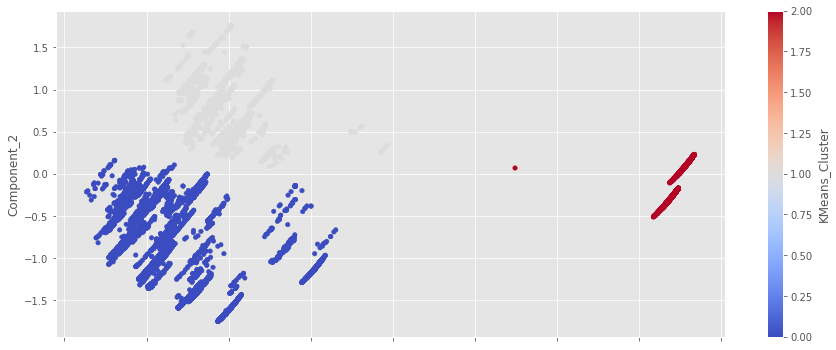

In [65]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [66]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)